## –£—Ä–æ–∫ 2. –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. L1- –∏ L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è. –°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫

In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

1. –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –ø—Ä–∏ –ø–æ–º–æ—â–∏ sklearn.datasets.make_regression –∏ –æ–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞. –ù–∞–Ω–µ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É –¥–ª—è –æ–±–æ–∏—Ö –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –æ–¥–∏–Ω –≥—Ä–∞—Ñ–∏–∫, —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ —Ä–∞–∑–Ω–∏—Ü–µ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –º–µ—Ç–æ–¥–æ–≤.

In [11]:
num_samples = 500
num_features = 1
b = 10
random_state = 24
noise = 100

X, y, coef = datasets.make_regression(n_samples=num_samples,
                                      n_features=num_features,
                                      n_informative=num_features,
                                      bias=b,
                                      coef=True,
                                      random_state=random_state,
                                      noise=noise)

# –î–æ–±–∞–≤–∏–º –µ–¥–∏–Ω–∏—á–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –∫ –¥–∞—Ç–∞—Å–µ—Ç—É –¥–ª—è
# –ø–æ–¥–±–æ—Ä–∞ –≤–µ—Å–∞ –¥–ª—è —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞
x_ones = np.ones(num_samples)
X = np.hstack((x_ones[:, np.newaxis], X))

print(X.shape)
print(y.shape)
print(coef)

(500, 2)
(500,)
75.90728241077991


In [12]:
def compare_models(*models):
    fig = plt.figure(figsize=(20, 10))

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –∏–¥–µ–∞–ª—å–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º
    plt.subplot(211)
    plt.scatter(X[:, 1], y)
    plt.plot(X[:, 1], coef * X[:, 1] + b, label="true line")
    for model in models:
        plt.plot(X[:, 1], model.W[1] * X[:, 1] + model.W[0], label=model.name)
    plt.legend(loc="best")

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–∫–∏ –æ—Ç —ç–ø–æ—Ö–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
    plt.subplot(223)
    for model in models:
        plt.plot(model.loss_history, label=f"{model.name} loss")
    plt.xlabel("epochs", size=14)
    plt.ylabel("loss", size=14)
    plt.legend(loc="best")

    # –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–µ–π –æ—Ç —ç–ø–æ—Ö–∏ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –≤–µ—Å–∞–º–∏ –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è
    plt.subplot(224)
    max_epochs = 0
    for model in models:
        max_epochs = max(max_epochs, len(model.wts_history))

        epochs = np.arange(len(model.wts_history))
        plt.scatter(epochs, model.wts_history[:, 0],
                    label=f"{model.name} w0", marker=".")
        plt.scatter(epochs, model.wts_history[:, 1],
                    label=f"{model.name} w1", marker=".")

    plt.scatter(np.arange(max_epochs), np.repeat(b, max_epochs), label="real w0", marker=".")
    plt.scatter(np.arange(max_epochs), np.repeat(coef, max_epochs), label="real w1", marker=".")
    
    plt.xlabel("epochs", size=14)
    plt.ylabel("weights", size=14)
    plt.legend(loc="best")

In [13]:
class TrainModel:
    def __init__(self, name, X, y, epochs, lr,
                 is_SGD, l1_lambda=None, l2_lambda=None):
        self.name = name
        self.X = X
        self.y = y
        self.epochs = epochs
        self.lr = lr
        self.is_SGD = is_SGD
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
    
    def calc_mse(self):
        W = self.W
        y_pred = self.X @ W
        # —Ñ—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏ - MSE
        loss = np.mean((self.y - y_pred) ** 2)
        if self.l1_lambda:
            # –ø—Ä–∏ l1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –¥–æ–±–∞–≤–ª—è–µ–º –∫ –ª–æ—Å—Å—É —Å—É–º–º—É –º–æ–¥—É–ª–µ–π –≤–µ—Å–æ–≤
            l1_loss = np.sum(np.abs(W))
            loss += self.l1_lambda * l1_loss
        if self.l2_lambda:
            # –ø—Ä–∏ l2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –¥–æ–±–∞–≤–ª—è–µ–º –∫ –ª–æ—Å—Å—É —Å—É–º–º—É –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –≤–µ—Å–æ–≤
            l2_loss = np.sum(W ** 2)
            loss += self.l2_lambda * l2_loss
        return loss

    def grad_step(self, X, y_true):
        W = self.W
        # –ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è MSE
        grad = 2 / len(y_true) * X.T @ (X @ W - y_true)
        if self.l1_lambda:
            # –ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –º–æ–¥—É–ª—è –≤–µ—Å–æ–≤ —Å–≤–æ–¥–∏—Ç—Å—è –∫ –∑–Ω–∞–∫—É –∫–∞–∂–¥–æ–≥–æ –≤–µ—Å–∞
            grad += self.l1_lambda * np.sign(W)
        if self.l2_lambda:
            # –ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –∫–≤–∞–¥—Ä–∞—Ç–∞ –≤–µ—Å–æ–≤ —Å–≤–æ–¥–∏—Ç—Å—è –∫ 2 * –≤–µ—Å
            grad += self.l2_lambda * 2 * W
        return grad

    def train(self):
        if self.is_SGD:
            print("training with SGD...")
        else:
            print("training with GD...")
        
        self.W = np.array([5., 10.])
        self.loss_history = []
        self.wts_history = [self.W.copy()]
        epoch = 0

        min_weight_dist = 1e-7 # –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –æ–±—É—á–µ–Ω–∏—è
        weight_dist = np.inf

        while weight_dist > min_weight_dist and epoch < self.epochs:
            if self.is_SGD:
                idx = np.random.randint(0, len(self.y))
                y_grad = self.y[[idx]]
                X_grad = self.X[[idx]]
            else:
                y_grad = self.y
                X_grad = self.X
            
            self.W -= lr * self.grad_step(X_grad, y_grad)
            weight_dist = np.linalg.norm(self.wts_history[-1] - self.W, ord=2)

            loss = self.calc_mse()
            
            self.loss_history.append(loss)
            self.wts_history.append(self.W.copy())

            if epoch % 1000 == 0:
                print(epoch, self.W, loss)
            
            epoch += 1

        self.wts_history = np.vstack(self.wts_history)
        
        print(f"stop training on {epoch} epoch")

training with GD...
0 [ 5.01034638 10.1237416 ] 13787.925268174915
1000 [11.04140049 64.18223262] 9942.467903279732
2000 [12.48437052 71.77371625] 9865.063906060454
3000 [12.7677992 72.8466913] 9863.470980368733
4000 [12.81863238 72.99926444] 9863.437591183998
5000 [12.8272881  73.02108163] 9863.436880959198
6000 [12.82871381 73.02421742] 9863.436865678657
7000 [12.82894335 73.02467023] 9863.43686534704
stop training on 7274 epoch
training with SGD...
0 [5.35604532 9.42009016] 13871.880447389587
1000 [11.57538603 67.01894151] 9899.97195389
2000 [11.75220835 69.80077748] 9874.561825360526
3000 [12.3047295 75.6115026] 9870.429818024564
4000 [17.83253056 73.77207703] 9888.708378574722
5000 [13.6252652  74.70014611] 9866.728752482484
6000 [14.81873161 70.74740703] 9872.896309715386
7000 [ 8.18588807 67.37231096] 9914.315659718644
8000 [10.41938713 75.14018847] 9874.089210479633
9000 [ 7.05463845 78.21160806] 9925.855912253488
10000 [ 9.53876268 70.3094335 ] 9880.78602715437
11000 [12.94171

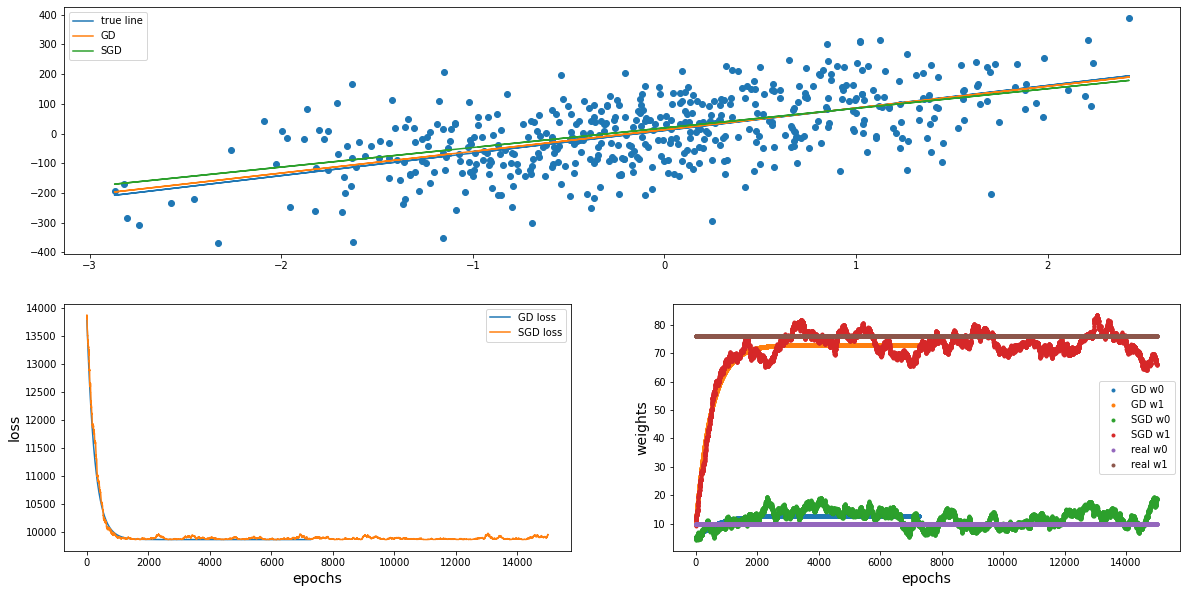

In [14]:
epochs = 15000
lr = 1e-03

GD_model = TrainModel("GD", X, y, epochs, lr, is_SGD=False)
GD_model.train()

SGD_model = TrainModel("SGD", X, y, epochs, lr, is_SGD=True)
SGD_model.train()

compare_models(GD_model, SGD_model)

2. –ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è –ø—É—Ç–µ–º –¥–æ–±–∞–≤–ª–µ–Ω–∏—è ùêø2 -—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (–≤ —Ñ—É–Ω–∫—Ü–∏—é, —Å—á–∏—Ç–∞—é—â—É—é MSE, –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –Ω–æ—Ä–º—É –≤–µ–∫—Ç–æ—Ä–∞ –≤–µ—Å–æ–≤) –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

training with GD...
0 [ 5.01024638 10.1235416 ] 13789.226888111607
1000 [10.94833424 63.72106519] 9992.728262947854
2000 [12.34510789 71.09801311] 9919.329488426834
3000 [12.61434422 72.11991831] 9917.8786220948
4000 [12.66170431 72.26233861] 9917.849410122448
5000 [12.66961175 72.28229892] 9917.848813239014
6000 [12.67088871 72.28511077] 9917.848800902731
7000 [12.67109025 72.28550873] 9917.848800645546
stop training on 7198 epoch
training with SGD...
0 [ 5.06651324 10.09348116] 13792.36151194988
1000 [11.07006475 67.15840005] 9945.953091641073
2000 [ 8.75556878 68.71950542] 9944.834675954677
3000 [14.38028351 63.9781593 ] 9990.796805179172
4000 [18.23743039 69.46472842] 9958.398381031448
5000 [12.08415129 73.49054057] 9919.703873512964
6000 [11.53705269 69.00227923] 9929.580859597681
7000 [13.98819907 79.94855932] 9977.291004863338
8000 [16.11281783 74.16339736] 9932.783184031277
9000 [ 9.65658645 67.17892981] 9951.72737629463
10000 [17.62871378 76.1196297 ] 9955.725092588951
11000 [

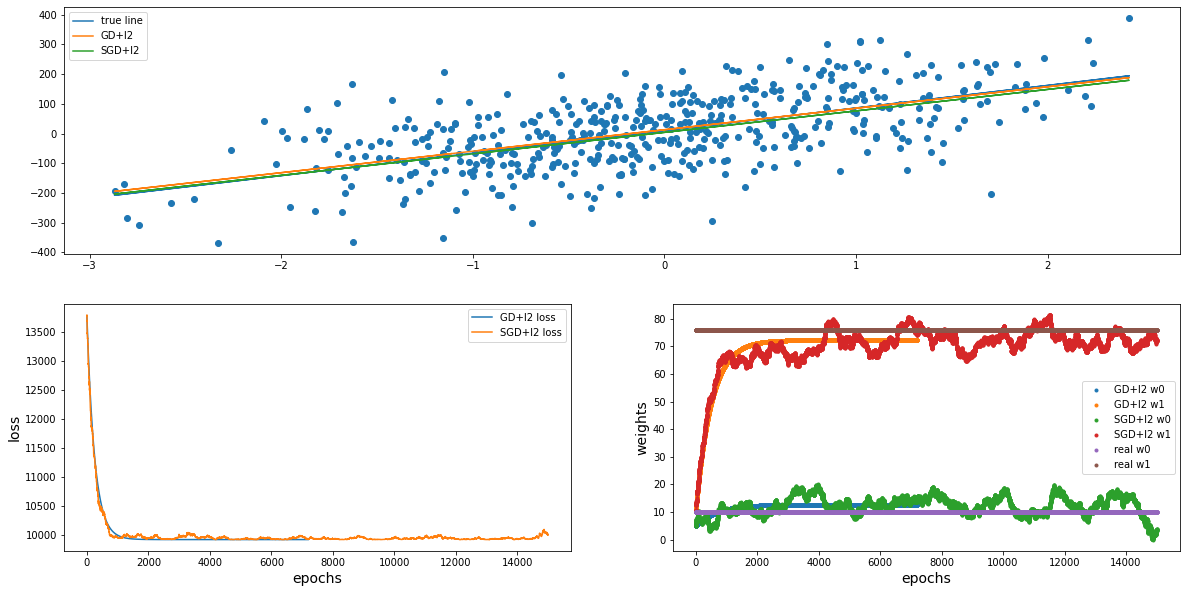

In [15]:
epochs = 15000
lr = 1e-03
l2_lambda = 0.01

GD_l2_model = TrainModel("GD+l2", X, y, epochs, lr, is_SGD=False, l2_lambda=l2_lambda)
GD_l2_model.train()

SGD_l2_model = TrainModel("SGD+l2", X, y, epochs, lr, is_SGD=True, l2_lambda=l2_lambda)
SGD_l2_model.train()

compare_models(GD_l2_model, SGD_l2_model)

3 [–æ–ø—Ü–∏—è]. –ú–æ–¥–µ—Ä–Ω–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞–Ω–∏—è 2, –∑–∞–º–µ–Ω–∏–≤ L2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é –Ω–∞ L1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é.

training with GD...
0 [ 5.01033638 10.1237316 ] 13788.077947198248
1000 [11.0369453  64.17773825] 9943.310462989195
2000 [12.47926089 71.76854648] 9865.922033173689
3000 [12.76259305 72.84141999] 9864.329457136266
4000 [12.81341197 72.99397789] 9864.296075779674
5000 [12.82206559 73.01579279] 9864.295365729733
6000 [12.82349098 73.01892824] 9864.295350453092
7000 [12.82372047 73.019381  ] 9864.295350121562
stop training on 7274 epoch
training with SGD...
0 [4.70277545 9.97803579] 13809.357347933723
1000 [14.13386271 60.7595303 ] 10015.70594861877
2000 [15.01949253 70.35957509] 9876.591262810993
3000 [11.01271371 68.6264726 ] 9885.950739363534
4000 [10.86390279 75.79782152] 9876.213690626044
5000 [11.48738566 81.46313906] 9937.395811679386
6000 [15.396808   74.00346143] 9871.658128958568
7000 [14.98630411 75.13305653] 9872.995608990628
8000 [15.91123667 71.54131983] 9876.3687852628
9000 [ 8.76913976 72.54249948] 9880.796855095303
10000 [14.95117513 65.79894589] 9921.569946116188
11000 [

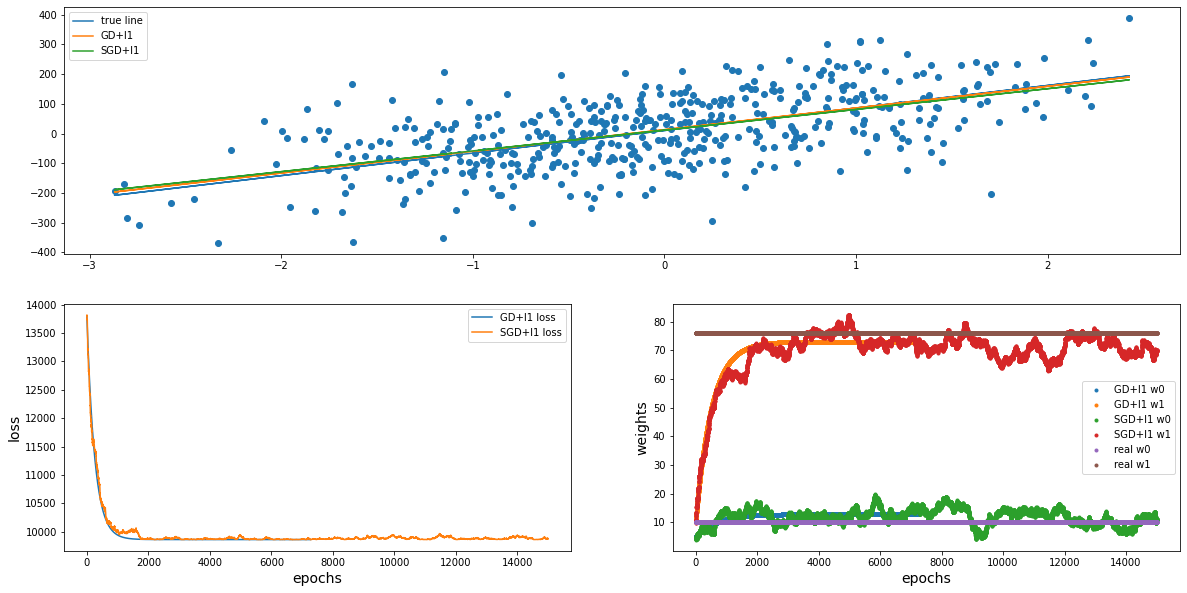

In [16]:
epochs = 15000
lr = 1e-03
l1_lambda = 0.01

GD_l1_model = TrainModel("GD+l1", X, y, epochs, lr, is_SGD=False, l1_lambda=l1_lambda)
GD_l1_model.train()

SGD_l1_model = TrainModel("SGD+l1", X, y, epochs, lr, is_SGD=True, l1_lambda=l1_lambda)
SGD_l1_model.train()

compare_models(GD_l1_model, SGD_l1_model)

–°—Ä–∞–≤–Ω–∏–º –º–æ–¥–µ–ª–∏ –æ–±—É—á–µ–Ω–Ω—ã–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–º —Å–ø—É—Å–∫–æ–º –±–µ–∑ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏, —Å l1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –∏ —Å l2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π

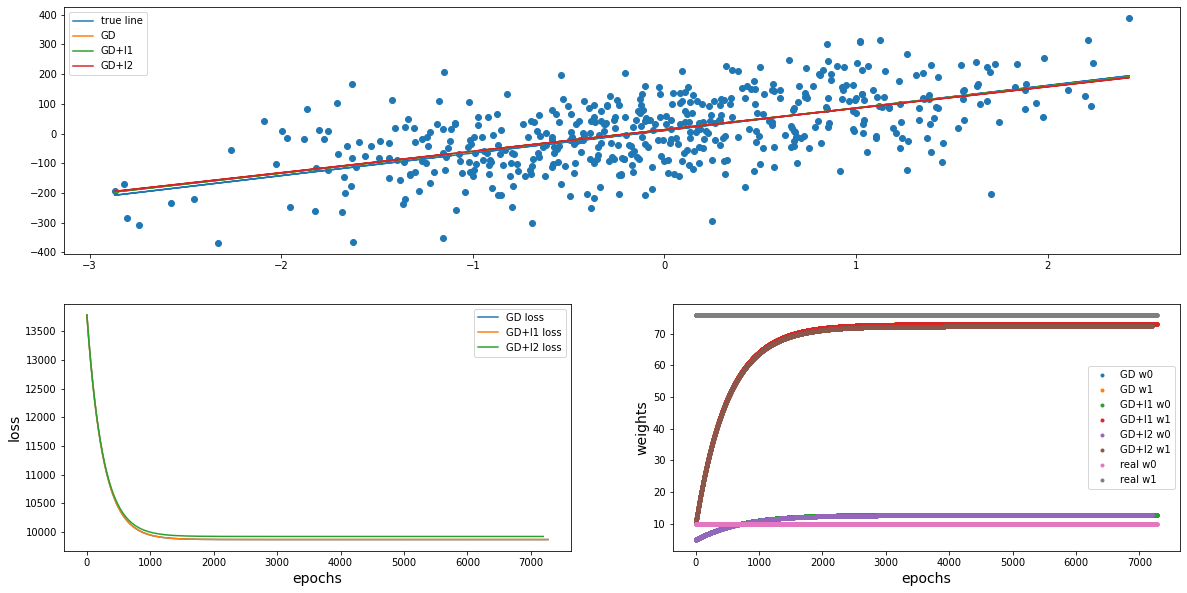

In [17]:
compare_models(GD_model, GD_l1_model, GD_l2_model)

–°—Ä–∞–≤–Ω–∏–º –º–æ–¥–µ–ª–∏ –æ–±—É—á–µ–Ω–Ω—ã–µ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–º —Å–ø—É—Å–∫–æ–º –±–µ–∑ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏, —Å l1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –∏ —Å l2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π

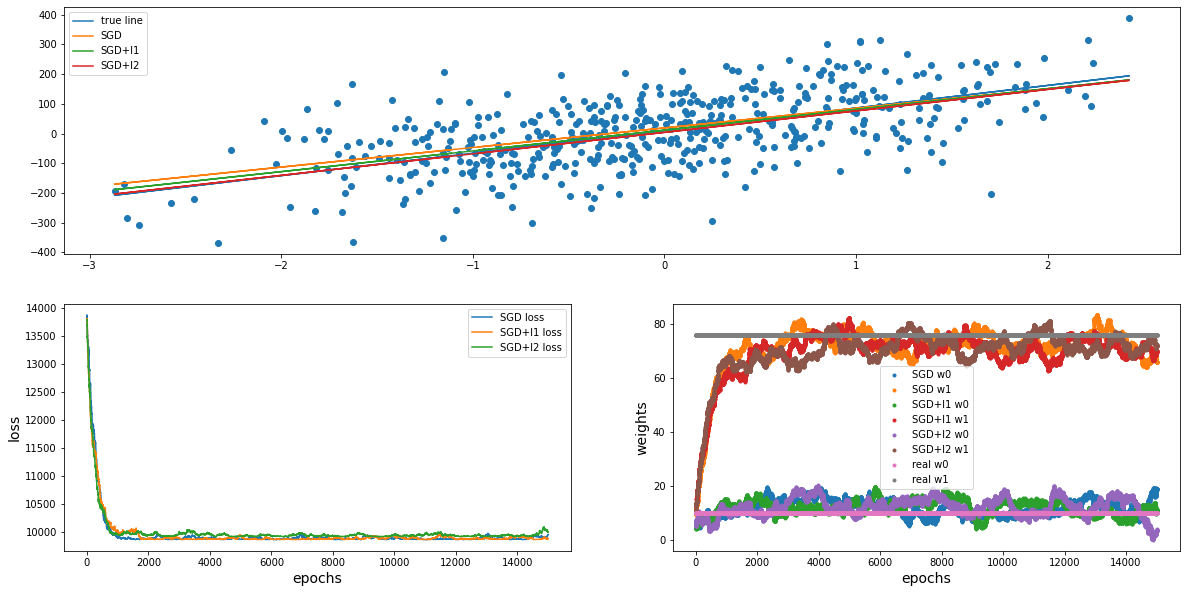

In [18]:
compare_models(SGD_model, SGD_l1_model, SGD_l2_model)

## –í—ã–≤–æ–¥—ã
–í—Å–µ –º–æ–¥–µ–ª–∏ —Å–æ—à–ª–∏—Å—å, –Ω–æ –º–æ–¥–µ–ª–∏ –æ–±—É—á–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –Ω–µ –¥–æ—Å—Ç–∏–≥–∞—é—Ç –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –Ω–∞–º–∏ –∫–∞—á–µ—Å—Ç–≤–∞. –ù–æ –≤—Å–µ –∂–µ —Ä–∞–∑–Ω–∏—Ü–∞ –∫—Ä–∞–π–Ω–µ –º–∞–ª–∞ –∏ –Ω–µ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–∞.

–í –ø—Ä–∏–Ω—Ü–∏–ø–µ –≤—Å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–ª—É—á–∏–ª–∏—Å—å –æ—á–µ–Ω—å —Å—Ö–æ–∂–∏–º–∏, –≤–æ–∑–º–æ–∂–Ω–æ –ø—Ä–æ–±–ª–µ–º–∞ –≤ —Ç–æ–º, —á—Ç–æ –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ–π.